<a href="https://colab.research.google.com/github/kelvinnjunge/Financial-Inclusion-/blob/main/Financial_Inclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis(Financial Inclusion Dataset)

# 1.0 Defining the Question

##a) Specifying the Data Analytic Question

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. Access to bank accounts is an essential contributor to long-term economic growth. The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account.



## b) Defining the Metric for Success

Based on the given data(factors) being able to predict ownership/access of a bank account by an individual




## c) Understanding the context

Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services.

Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services.

Therefore, access to bank accounts is an essential contributor to long-term economic growth.

## d) Recording the Experimental Design

We'll perform Explorative Data Analysis, i.e Univariate, Bivariate and Multivariate Analysis to get the relationships and differences between different variables to come up with a prediction on individuals who are most likely to have or use a bank account



e) Data Relevance

The main dataset contains demographic information and what financial services are used by individuals across East Africa i.e(Kenya, Rwanda, Tanzania, and Uganda). This data was extracted from various Finscope surveys ranging from 2016 to 2018.

The data contains important variables such as Gender, Education level, Age, persons with a bank account, Job type which are very useful in determining whether the different groups have access to a bank account or not


# 2. Reading the Data

In [1]:
#Importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Data from the source i.e. csv
f = pd.read_csv('Financial Dataset - 1.csv')

# 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#
f.shape

(23524, 13)

In [4]:
# Previewing the top of our dataset
#
f.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [5]:
# Previewing the bottom of our dataset
# 
f.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [6]:
# Checking whether each column has an appropriate info
#
f.info

<bound method DataFrame.info of       country  year  ...              Level of Educuation                Type of Job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...         

# 4 External Data Source Validation
Checked the additional information to get a clearer picture of the data. Key points is the year of the different records (depending with country). The general minimum age (16yrs) so if there's any discrepancy then that is something to question(Anomaly)

# 5. Tidying the Dataset

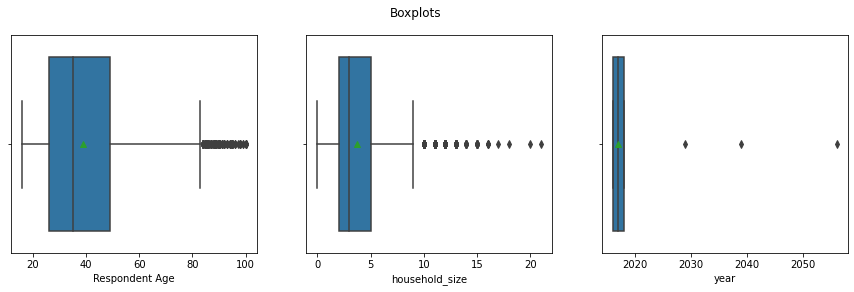

In [7]:
# Checking for Outliers & Anomalies
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(15, 4))
fig.suptitle('Boxplots')
sns.boxplot(data=f,x=f['Respondent Age'],ax=ax1, showmeans = True)
sns.boxplot(data=f,x=f['household_size'],ax=ax2, showmeans = True)
sns.boxplot(data=f,x=f['year'],ax=ax3, showmeans = True)


In [8]:
# Checking for Outliers & Anomalies
#replacing
f.loc[[213]]
#213 is a Kenyan record so it should be 2018
f.replace({'year': {2029: 2018}}, inplace= True)

f.loc[[308]]
#308 is a Kenyan record so it should be 2018
f.replace({'year': {2056: 2018}}, inplace= True)

#replacing
f.loc[[7014]]
#308 is a Rwandan record so it should be 2016
f.replace({'year': {2039: 2016}}, inplace= True)
f.loc[[7014]]

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
7014,Rwanda,2016,uniqueid_947,No,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Primary education,Informally employed


In [9]:
# Identifying the Missing Data
#
f.household_size=f['household_size'].fillna(value=f['household_size'].mean())
f['Respondent Age']=f['Respondent Age'].fillna(value=f['Respondent Age'].mean())
f=f.dropna()

In [10]:
# Identifying the Missing Data
#
f.isnull().any()

country                   False
year                      False
uniqueid                  False
Has a Bank account        False
Type of Location          False
Cell Phone Access         False
household_size            False
Respondent Age            False
gender_of_respondent      False
The relathip with head    False
marital_status            False
Level of Educuation       False
Type of Job               False
dtype: bool

In [11]:
#Looking for duplicate values
f.duplicated().sum

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
23519    False
23520    False
23521    False
23522    False
23523    False
Length: 23383, dtype: bool>

In [19]:
# More data cleaning procedures
#the column names and dropping unnecessary fields
f.columns = f.columns.str.replace(' ', '_') 
f.columns = f.columns.str.strip() 
f.columns = f.columns.str.lower()
#dropping column
f.drop('uniqueid', axis=1, inplace=True)
#rename column
f.rename({'respondent_age': 'age','gender_of_respondent': 'gender','the_relathip_with_head': 'r_ship_with_head'}, axis=1, inplace=True)
f.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,age,gender,r_ship_with_head,marital_status,level_of_educuation,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


# 6 Exploratory Analysis

## Univariate Analysis

In [20]:
# Plotting the Univariate summaries and recording our observations
#General statistics of the numerical data
f.describe()

,year,household_size,age
count,23383.000000,23383.000000,23383.000000
mean,2016.977077,3.688478,38.803202
std,0.848999,2.280123,16.515560
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


In [21]:
f.nunique()

country                 4
year                    3
has_a_bank_account      2
type_of_location        2
cell_phone_access       2
household_size         22
age                    86
gender                  2
r_ship_with_head        6
marital_status          5
level_of_educuation     7
type_of_job            10
dtype: int64

In [22]:
#Measures of central tendency and dispersion
#Using Age as this is the independent variable that we propose influences the dependent variable(Has a bank account)
print(f'Min: {f.age.min()}')
print(f'Q1: {f.age.quantile(.25)}')
print(f'Q2: {f.age.quantile(.50)}')
print(f'Q3: {f.age.quantile(.75)}')
print(f'Max: {f.age.max()}')
print(f'Mean: {f.age.mean()}')
print(f'Median: {f.age.median()}')
print(f'Mode: {f.age.mode().values[0]}')
print(f'Skew: {f.age.skew()}')
print(f'Kurtosis: {f.age.kurt()}')

Min: 16.0
Q1: 26.0
Q2: 35.0
Q3: 49.0
Max: 100.0
Mean: 38.80320239893677
Median: 35.0
Mode: 30.0
Skew: 0.8421293556879087
Kurtosis: 0.104461837582694


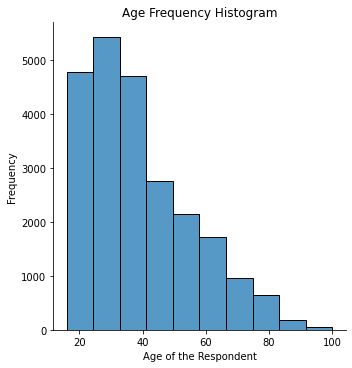

In [23]:
#Visual look at the age data
sns.displot(f['age'], kind='hist',bins=10, kde=False)
plt.ylabel("Frequency")
plt.xlabel("Age of the Respondent")
plt.title("Age Frequency Histogram")
plt.show()

In [24]:
#Measures of central tendency and dispersion
#Using Household size because it could also be an indicator of the dependent variable(Has a bank account)
print(f'Min: {f.age.min()}')
print(f'Q1: {f.age.quantile(.25)}')
print(f'Q2: {f.age.quantile(.50)}')
print(f'Q3: {f.age.quantile(.75)}')
print(f'Max: {f.age.max()}')
print(f'Mean: {f.age.mean()}')
print(f'Median: {f.age.median()}')
print(f'Mode: {f.age.mode().values[0]}')
print(f'Skew: {f.age.skew()}')
print(f'Kurtosis: {f.age.kurt()}')

Min: 16.0
Q1: 26.0
Q2: 35.0
Q3: 49.0
Max: 100.0
Mean: 38.80320239893677
Median: 35.0
Mode: 30.0
Skew: 0.8421293556879087
Kurtosis: 0.104461837582694


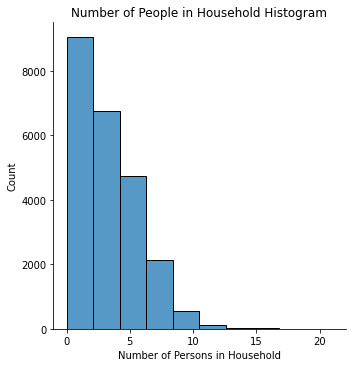

In [25]:
#Visual look at the age data
sns.displot(f['household_size'], kind='hist',bins=10, kde=False)
plt.ylabel("Count")
plt.xlabel("Number of Persons in Household")
plt.title("Number of People in Household Histogram")
plt.show()

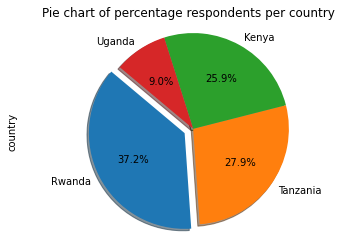

In [26]:

#pie chart for countries
explode = (0.1, 0, 0, 0) 
f.country.value_counts().plot(kind='pie',autopct='%1.1f%%', explode=explode, shadow = True, startangle = 140 )

plt.axis('equal')
plt.title('Pie chart of percentage respondents per country')
plt.show()
#We can conclude that Rwanda has the highest number of respondents in this study at 37.2% and Uganda the lowest at 9.0%


# Bivariate Analysis

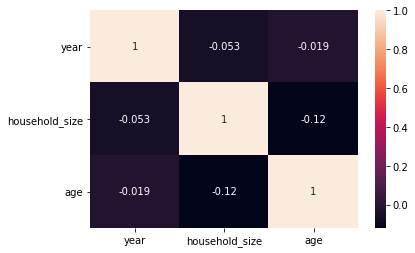

In [27]:
# Ploting the bivariate summaries and recording our observations
#Numerical to Numerical:Correlation
#checking correlations
sns.heatmap(f.corr(),annot=True)
plt.show()

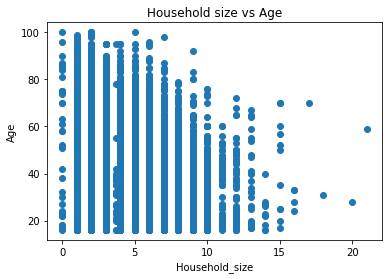

In [29]:
#Plotting scatter plots
plt.scatter(f["household_size"] , f["age"])

# Giving our scatterplot a title
plt.title('Household size vs Age')

# Labelling our x axis
plt.xlabel('Household_size')

# Labelling our y axis
plt.ylabel('Age')

# We then display our scatterplot as shown below
plt.show()

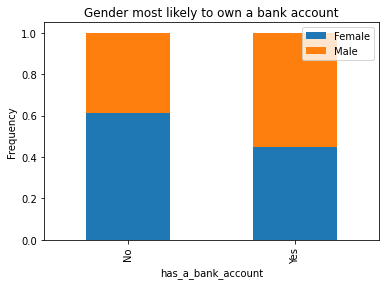

In [30]:
#Gender most likely to own a bank account
g = f.groupby('has_a_bank_account')['gender'].value_counts(normalize=True).unstack()
g.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc="upper right")

# Adding a title
plt.title("Gender most likely to own a bank account")

# Displaying our chart
plt.show()

#We see that the difference between the males and females who own a bank account is significant. 
#The number of Males who own a bank account is significantly more than females.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


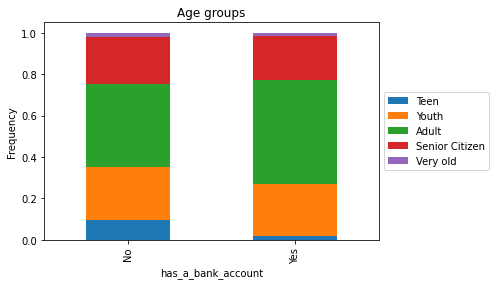

In [33]:
#Numerical-Categorical Variables
#create Age groups

bins= [10,20,30,50,80,100]
labels = ['Teen','Youth','Adult','Senior Citizen','Very old']
f['AgeGroup'] = pd.cut(f['age'], bins=bins, labels=labels, right=False)
f
#People from which AgeGroup are most likely to own a bank account
ax6 = f.groupby('has_a_bank_account')['AgeGroup'].value_counts(normalize=True).unstack()
ax6.plot(kind='bar', stacked='True',title=str(ax1))

# labeling our y axis
plt.ylabel("Frequency")

# Creating a key/legend for our chart
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));

# Adding a title
plt.title("Age groups")

# Displaying our chart
plt.show()

# Multivariate Analysis

In [ ]:
#Converting datatypes
#convert column year from int64 to datetime
#and residence to category
f['country'] = f['country'].astype('category')
f['has_a_bank_account'] = f['has_a_bank_account'].astype('category')
f['type_of_location'] = f['type_of_location'].astype('category')
f['gender'] = f['gender'].astype('category')
f['level_of_education'] = f['level_of_educuation'].astype('category')
f['type_of_job'] = f['type_of_job'].astype('category')

In [57]:
df= f.copy()
df.head(3)
to_nums = {"has_a_bank_account": {"Yes": 1, "No": 0},
           "type_of_location": {"Rural": 0, "Urban": 1},
           "gender_of_respondent": {"Female": 2, "Male": 3}}
df.replace(to_nums, inplace=True)
import scipy.stats as stats
x = df['has_a_bank_account']
y = df['age']
stats.pointbiserialr(x, y)
#There is close to no linear correlation between age and having a bank account


PointbiserialrResult(correlation=0.01956960652068731, pvalue=0.0027660012475827192)

In [58]:
x = df['has_a_bank_account']
y = df['household_size']
stats.pointbiserialr(x, y)
#There is no linear correlation between householdd size and having a bank account

PointbiserialrResult(correlation=-0.02292700548885654, pvalue=0.0004546275608440352)

In [62]:
x = df['has_a_bank_account']
z = df['gender_of_respondent']
stats.pointbiserialr(x, z)
#There is a weak correlation between gender and having a bank account

PointbiserialrResult(correlation=0.11665703447163422, pvalue=1.2049643329998852e-71)

Reduction Techniques

In [63]:
#LDA using the dataset fin_df2
#dividing data into labels and feature set

x = f.iloc[:, 5:6].values
y = f.iloc[:, 2].values
x
y

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)

In [64]:
#dividing data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Feature scaling
#performing feature scaling:
# 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [66]:
#performing LDA with Scikit-Learn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
x_train = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)
print(x_test)
print(x_train)

[[ 1.01111069]
 [ 0.13484223]
 [ 0.57297646]
 ...
 [ 1.44924492]
 [-0.74142623]
 [-0.303292  ]]
[[-1.17956046]
 [ 0.13484223]
 [ 1.88737915]
 ...
 [-0.74142623]
 [-0.74142623]
 [-0.74142623]]


In [67]:
#Training and Making Predictions
#using the random forest classifier to evaluate the performance of a LDA-reduced algorithms
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [68]:
# Evaluating the Performance
# with the help of a confusion matrix and find the accuracy of the prediction.


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))

# We can see that with one linear discriminant, the algorithm achieved the same level of accuracy as the
# one achieved with one principal component.

[[4027    0]
 [ 650    0]]
Accuracy0.8610220226641009


# 7 Challenging the solution

Summary



1.   The difference between the males and females who own a bank account is significant. The number of Males who own a bank account is significantly more than females
2.   Individuals who are self employed are most likely to have a bank account and those who are informally employed are less likely to have a bank account
3. Individuals from urban setup are most likely to have a bank account and those from rural areas are less likely to have a bank account
4. Individuals with a secondary education are most likely to have a bank account and those with a primary level education are less likely to have a bank account
5. Individuals from Kenya are most likely to have a bank account and those Uganda are less likely to have a bank account
6. Individuals between the ages of 30-50, adults are most likely to have a bank account and those above 80years are less likely to have a bank account
7.Reduction Technique was Linear Discriminant Analysis and the model achieved an accuracy of 86.10%.


# 8 Follow up questions
We need to look at the economic factors and the government policies influencing the peoples' decision to opening a bank account.



a). Did we have the right data?


*   Yes




 b) Do we need other data to answer our question?
The data was able to answer our research question

*   The data was able to answer our research question




c). Did we have the right question?


*   Yes

